<a href="https://colab.research.google.com/github/JManuelRG/cursopython/blob/main/2%20Uso%20de%20librer%C3%ADas/Factor_de_Fricci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo del factor de fricción para un fluido

# Número de Reynolds y Régimen de Flujo:
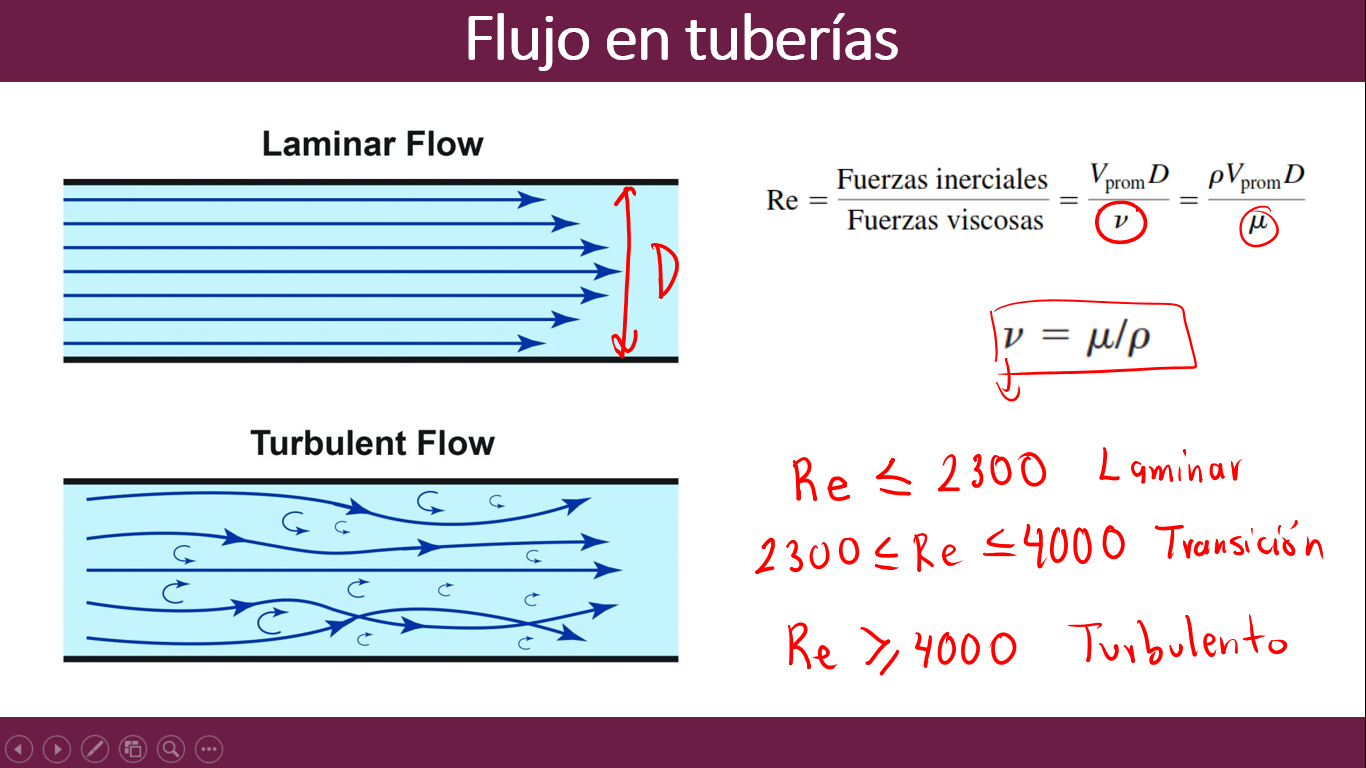

# Factor de Fricción: Caso Laminar
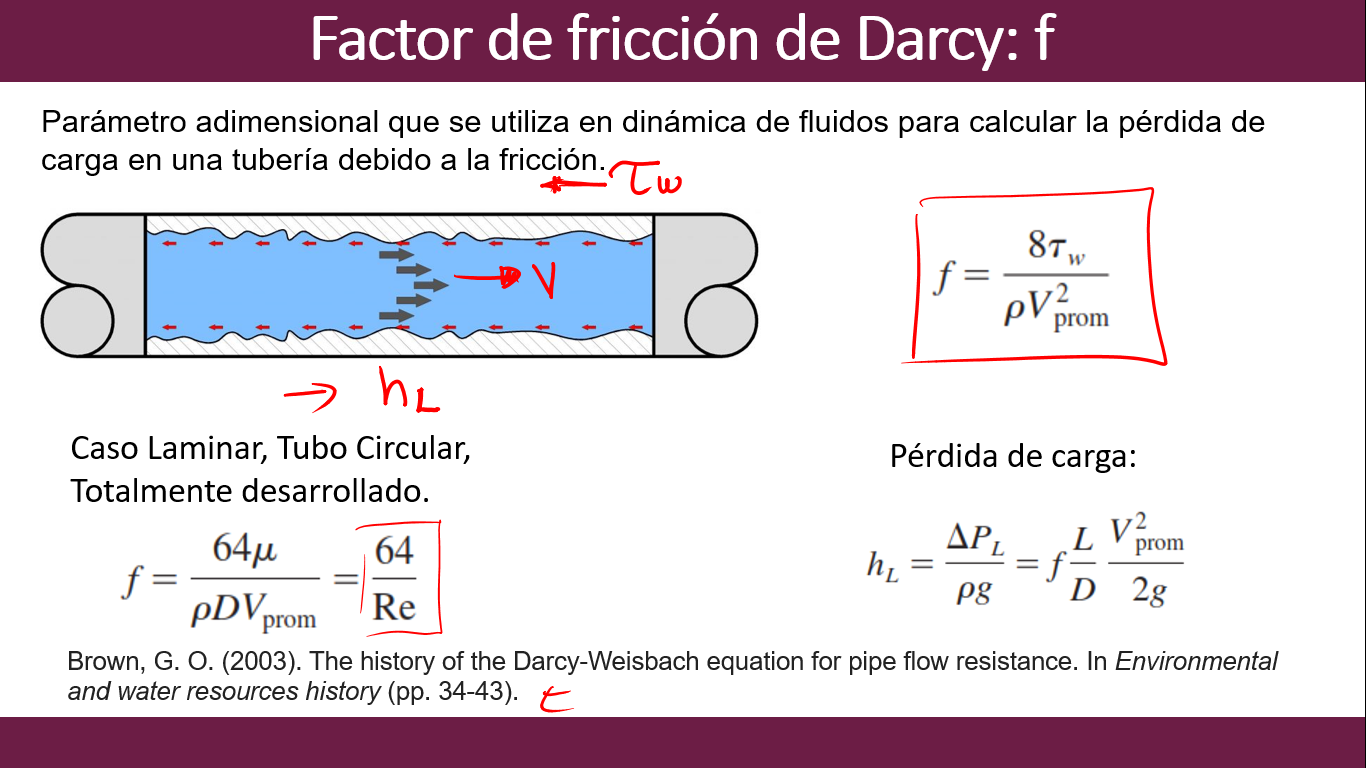

# Problema Planteado:
# Video Explicación: https://youtu.be/dnaCUx-v8xY

# Código de este cuaderno: https://youtu.be/X09MutRbOxc

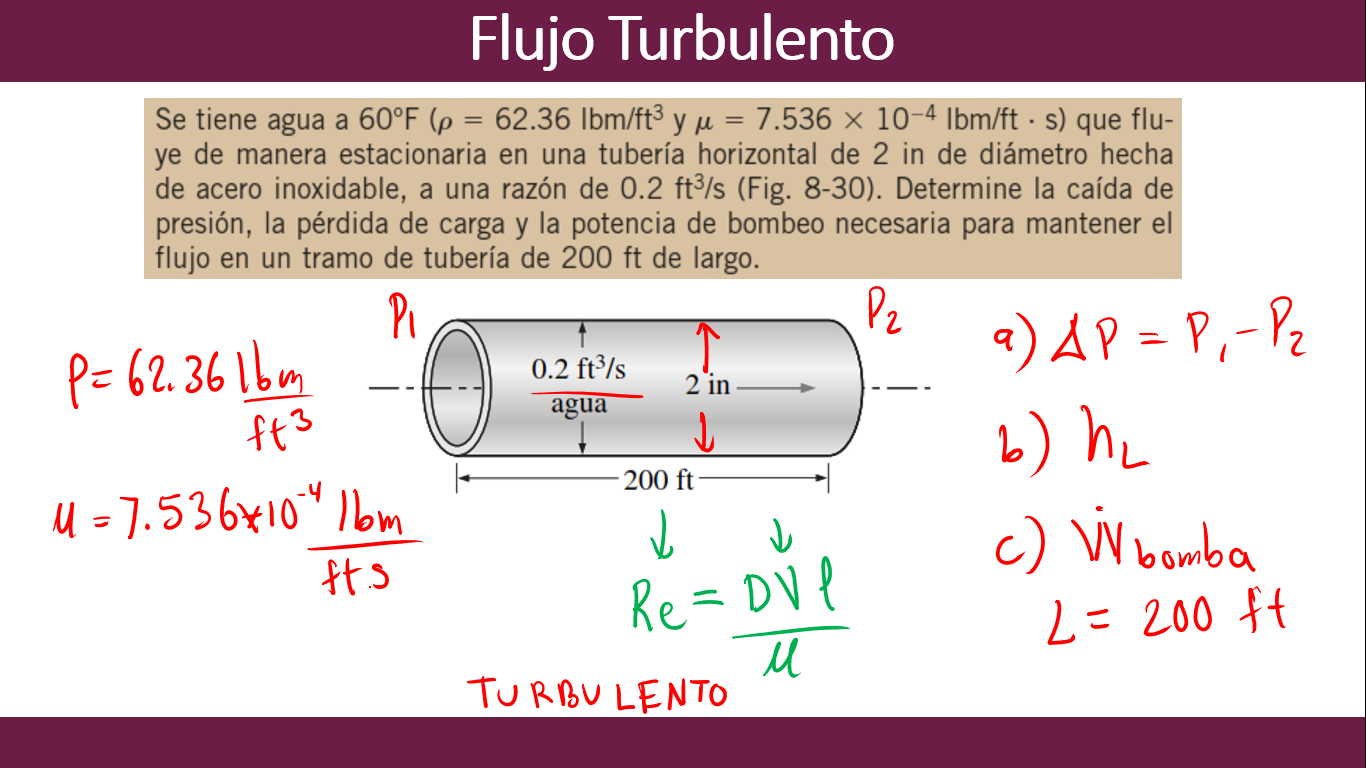

# Datos para el Cálculo del factor de fricción

In [ ]:
# Datos de entrada 
D= 1/6 #diámetro en ft
e=0.000007 # Rugosidad absoluta
v=9.17 #ft/s
L=200 #longitud de la tubería en ft

# Propiedades:
ro=62.36 #densidad en lbm/ft^3
mu=7.536e-4 # Viscosidad dinámica en lbm/fts

#Cálculo del número de Reynolds

In [ ]:
Re = D*v*ro/mu
print(f"El valor de Re = {Re}")
if Re<2300:
  regimen="LAMINAR"
  print(f"El factor de fricción es {64/Re}")
if Re>4000:
  regimen="TURBULENTO"
  print("Se requiere calcular el factor de fricción como se muestra a continuación")
if Re>2300 and Re<4000:
  regimen="TRANSICIONAL"
print(f"El flujo es {regimen}")

El valor de Re = 126468.77211606511
Se requiere calcular el factor de fricción como se muestra a continuación
El flujo es TURBULENTO


# Cálculo del Factor de Fricción:

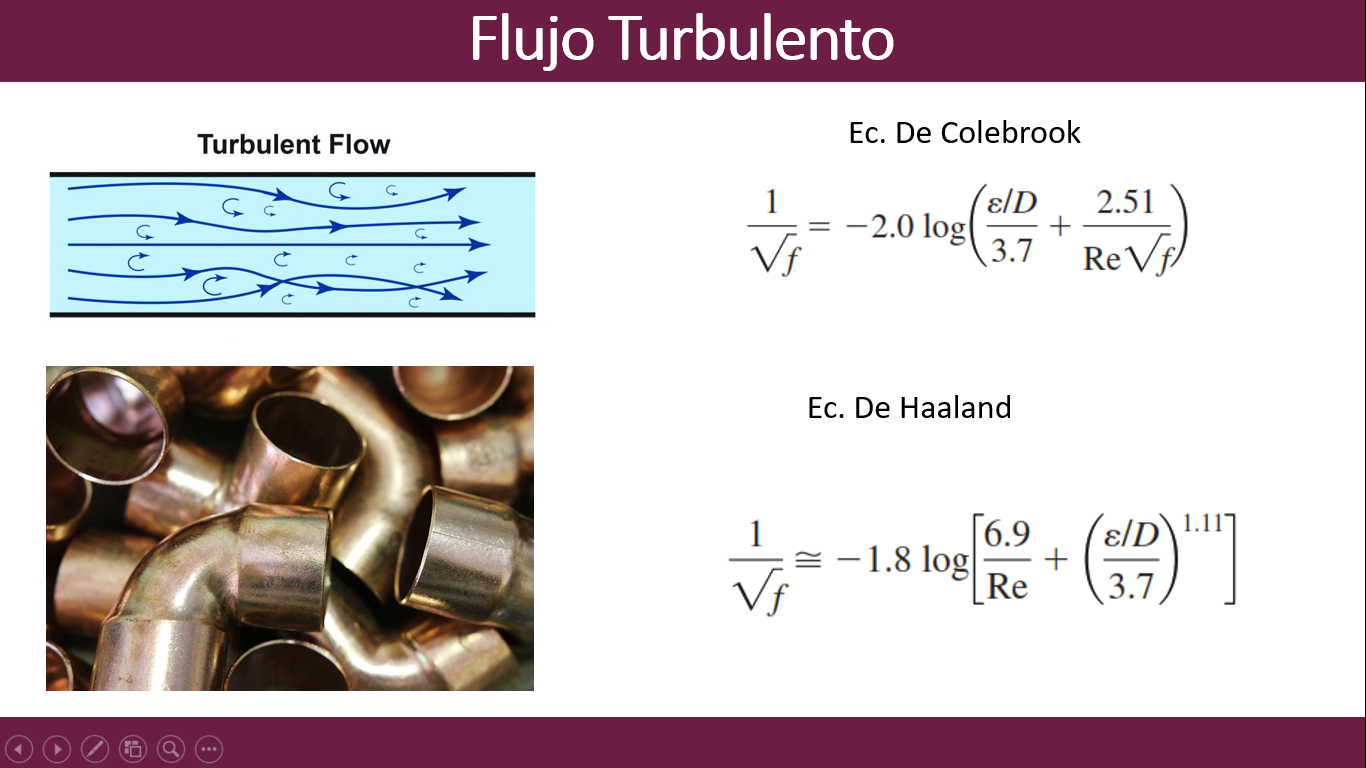



In [ ]:
# Ec. de Colebrook
from sympy import *
f=symbols('f')

# Ecuación a resolver:
colebrook = Eq(1/sqrt(f),
               -2*log((e/D)/3.7+2.51/(Re*sqrt(f)),10)
               )
display(colebrook)

Eq(1/sqrt(f), -2*log(1.13513513513514e-5 + 1.98467966281548e-5/sqrt(f))/log(10))

In [ ]:
# Solución de Ec. de Colebrook # No convergió
sol=nsolve(colebrook,f,0.02) # valor inicial 0.02

ValueError: ignored

# Solución usando la librería Scipy
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html

---



In [ ]:
from scipy.optimize import root
import numpy

def ec_colebrook(x):
    return (-2*numpy.log10((2.51/(Re*numpy.sqrt(x))) + ((e/D)/(3.71))) - 1.0/numpy.sqrt(x))

Resp = root(ec_colebrook, 0.03)
print(Resp)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 8.882e-16]
       x: [ 1.740e-02]
    nfev: 10
    fjac: [[-1.000e+00]]
       r: [-2.412e+02]
     qtf: [ 4.501e-10]


In [ ]:
Resp.x

array([0.01739512])

In [ ]:
print(f"Solución de la ecuación: f={Resp.x[0]}")
print(f"Valor de la función = {Resp.fun}")

Solución de la ecuación: f=0.017395123985202366
Valor de la función = [8.8817842e-16]


# Gráfico de la ecuación de Colebrook

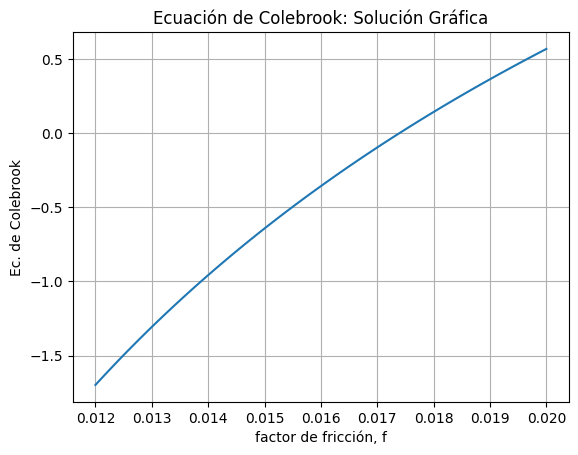

In [ ]:
import matplotlib.pyplot as plt

vectorf=numpy.linspace(0.012,0.02,num=100)
vectorcolebrook = ec_colebrook(vectorf)

plt.plot(vectorf,vectorcolebrook)
plt.title('Ecuación de Colebrook: Solución Gráfica')
plt.xlabel('factor de fricción, f')
plt.ylabel('Ec. de Colebrook')
plt.grid()

# Ec. de Haaland
#$$\frac{1}{\sqrt{f}}=-1.8log \left[ \frac{6.9}{Re}+ \left(\frac{\epsilon}{D}\right)^{1.11} \right]$$

#$f=\left(-1.8log \left[ \frac{6.9}{Re}+ \left(\frac{\epsilon}{D}\right)^{1.11} \right]\right)^{-2} $

# Ec. de Haaland

In [ ]:
factorHaaland = ((-1.8*numpy.log10(6.9/Re + (e/D)**1.11)))**-2
print("Factor de fricción calculado con la ecuación de Haaland =")
print({factorHaaland})

Factor de fricción calculado con la ecuación de Haaland =
{0.017793589567448247}
